<a href="https://colab.research.google.com/github/michael12-dev/Team-Sentinel/blob/main/Team_Sentinel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Group Name: Team Sentinel

## Case Study: HR / Workforce Analytics: Employee Attrition Prediction

## Group Lead: Michael Nzere

## Task Approach: Classifcation Modelling

# **Phase 1: Data Loading & Inspection**

In [ ]:
# import required libraries for task

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) ## To force pandas to display all coloumns and not hide them

# import from ScikitLearn, all important machine learning libraries

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error #for linear regression models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score #for classification models
from imblearn.over_sampling import SMOTE
from collections import Counter


import xgboost
from xgboost import XGBRegressor
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

import joblib

In [ ]:
# import the attrition dataset from Kaggle

import kagglehub

# Download the file directly from Kaggle. To avoid storing on one member's PC and uploading everytime we need to restart the kernel after hibernation
path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")

print("Path to dataset files:", path)

# Construct the full path to the CSV file
csv_file_path = f"{path}/WA_Fn-UseC_-HR-Employee-Attrition.csv"

df = pd.read_csv(csv_file_path)


Using Colab cache for faster access to the 'ibm-hr-analytics-attrition-dataset' dataset.
Path to dataset files: /kaggle/input/ibm-hr-analytics-attrition-dataset


In [ ]:
# Display the first few rows of the DataFrame
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


##Data header Observations

### Please note that from Kaggle, some of the data have been encoded. It is important to take note especially during the EDA interpretation session.

**Education**
- 1: Below College
- 2: College
- 3: Bachelor
- 4: Master
- 5: Doctor

**EnvironmentSatisfaction**
*   1 'Low'
*   2 'Medium'
*   3 'High'
*   4 'Very High'

**JobInvolvement**
*   1 'Low'
*   2 'Medium'
*   3 'High'
*   4 'Very High'

**JobSatisfaction**
*   1 'Low'
*   2 'Medium'
*   3 'High'
*   4 'Very High'

**PerformanceRating**
*   1 'Low'
*   2 'Good'
*   3 'Excellent'
*   4 'Outstanding'

**RelationshipSatisfaction**
*   1 'Low'
*   2 'Medium'
*   3 'High'
*   4 'Very High'

**WorkLifeBalance**
*   1 'Bad'
*   2 'Good'
*   3 'Better'
*   4 'Best'


In [ ]:
# To display the rows and columns of the data

df.shape

(1470, 35)

In [ ]:
# To check an overview of the dataset to see the datatype and null count

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# To check for null values in the dataset

df.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [ ]:
# To see the statistical spread of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [ ]:
# To check the amount of unique values in some columns as observed from the dataset overview

df["EmployeeCount"].value_counts()

,count
EmployeeCount,
1,1470


In [ ]:
df["Over18"].value_counts()

,count
Over18,
Y,1470


In [ ]:
df["StandardHours"].value_counts()

,count
StandardHours,
80,1470


### **Insight Summary through the lens of:**

df.info(), df.shape, df.isna().sum() and df[""].value_counts()



*   There are no null values in all columns, suggesting that there is a complete datasets across all columns
*   The following columns datatype are in categorical form (object), it should be encoded before inputted into the ML algorithms - BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18, OverTime

*   The columns EmployeeCount, Over18, StandardHours contain a single unique value, they can be removed during the ML input features naming
*   The dataset contains 1470 rows and 37 columns
*   The target variable (employee attrition) is in categorical form, it needs to be encoded before being inputted into the ML algorithms



# **Phase 2: Exploratory Data Analysis (EDA)**

In [ ]:
# To check for unique values in Attrition column (number of employees that left or stayed)
df["Attrition"].value_counts()

,count
Attrition,
No,1233
Yes,237


In [ ]:
# To check for the percentage of employees that left or stayed
df["Attrition"].value_counts(normalize=True) * 100

,proportion
Attrition,
No,83.877551
Yes,16.122449


In [ ]:
# To visualize attrition distribution on a countplot
# To check for unique values in the Attrition column (number of employees that left or stayed)

df["Attrition"].value_counts()

,count
Attrition,
No,1233
Yes,237


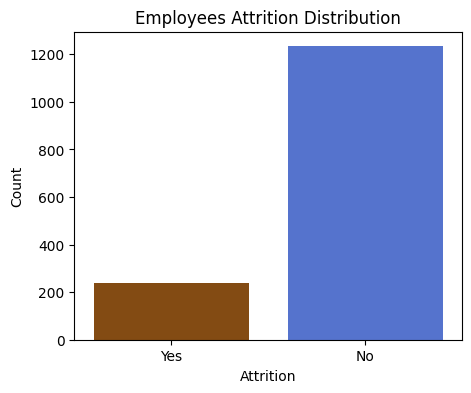

In [ ]:
# To visualize attrition distribution on a countplot

plt.figure(figsize=(5, 4))
colors = {'No': '#4169E1', 'Yes': '#964b00'}
sns.countplot(data=df, x='Attrition', palette=colors)
plt.title('Employees Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count',fontsize=10)
plt.show()

- The job distribution turnover indicates that the overwhelming majority of
employees chose to stay with the company, while only a small proportion left.

In [ ]:
# Percentage of employees who resigned

total = len(df)
employee_resign = df["Attrition"].value_counts().get("Yes", 0) # To ensure the code doesn't break even if "Yes" is not present
employee_resign_percentage = (employee_resign / total) * 100
print(f"Percentage of employees who resigned: {employee_resign_percentage:.2f}%")

Percentage of employees who resigned: 16.12%


In [ ]:
mean = np.mean(df["Age"])
median = np.median(df["Age"])
print(f"Employees' mean age: {mean}\n")
print(f"Employees' median age: {median}")

Employees' mean age: 36.923809523809524

Employees' median age: 36.0


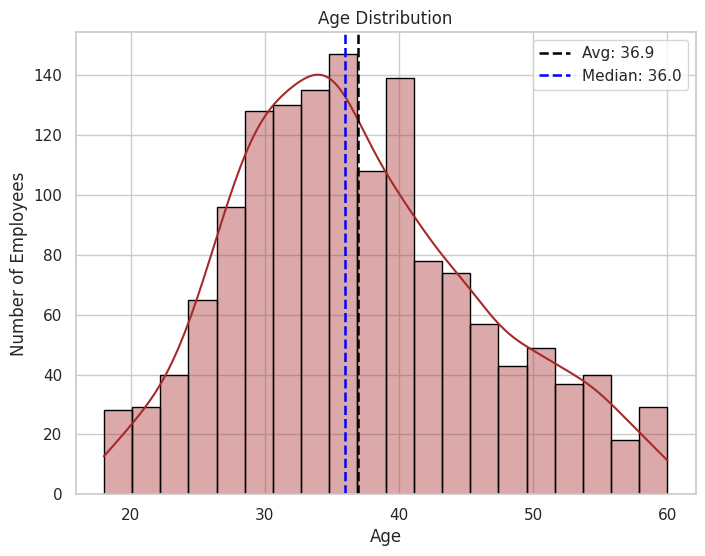

In [ ]:
# Employees' age distribution

plt.figure(figsize=(8,6))
sns.set_theme(style = "whitegrid")

sns.histplot(data=df, x="Age", bins=20, edgecolor="black", color='brown',kde=True, alpha=0.4) # To create a histogram with a kernel density estimate(KDE)
avg = np.mean(df["Age"])
median = np.median(df["Age"])
plt.axvline(avg, color="black",linestyle="--",linewidth="1.8", label=f"Avg: {avg:.1f}")
plt.axvline(median, color="blue",linestyle="--",linewidth="1.8", label=f"Median: {median:.1f}")
plt.legend()
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Employees")
plt.show()

- The bell curve displays right skewness, indicating that employee attrition is more concentrated among individuals aged 20–30.

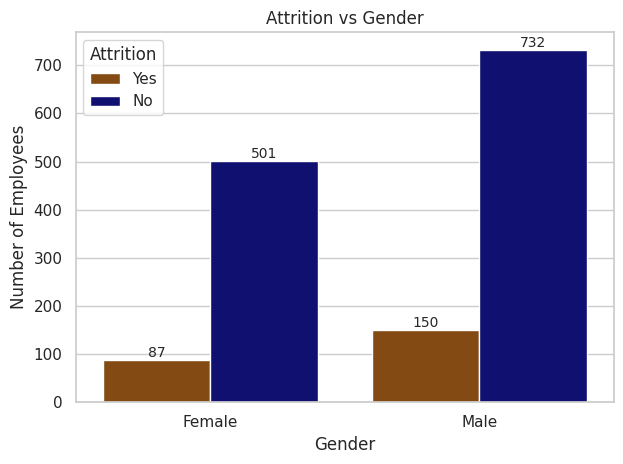

In [ ]:
# Job termination by gender

colors = {'No': '#000080', 'Yes': '#964b00'}
ax = sns.countplot(data=df, x='Gender', hue='Attrition', palette=colors)
plt.title('Attrition vs Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Employees')

# To place counts on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10)  # To place counts on top of each bar, and show numbers as integers

plt.tight_layout()
plt.show()

- From the plot, male employees are more likely
 to leave their jobs than the female employees.

In [ ]:
# To check for unque values in the Department column

df["Department"].value_counts()

,count
Department,
Research & Development,961
Sales,446
Human Resources,63


In [ ]:
# Percentage of employees who worked overtime

total = len(df)  # Total number of employees
overtime_count = df["OverTime"].value_counts().get("Yes", 0)  # To ensure the code doesn't break even if "Yes" is not present
overtime_percentage = (overtime_count / total) * 100
print(f"Percentage of employees who worked overtime: {overtime_percentage:.2f}%")

Percentage of employees who worked overtime: 28.30%


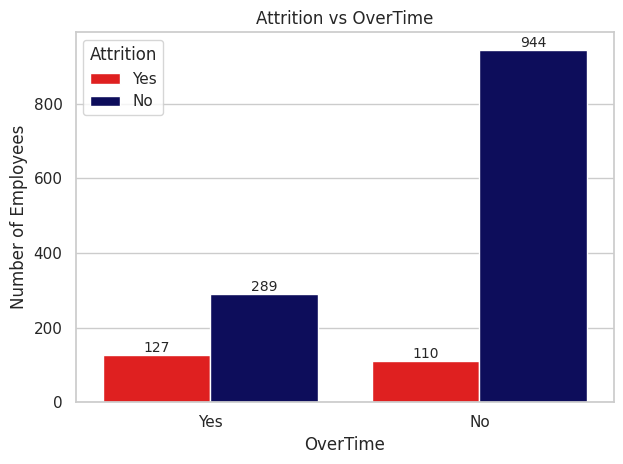

In [ ]:
# Attrition by Overtime status

colors = {'No': '#000068', 'Yes': '#FF0000'}
ax = sns.countplot(data=df, x='OverTime', hue='Attrition', palette=colors)
plt.title('Attrition vs OverTime')
plt.xlabel('OverTime')
plt.ylabel('Number of Employees')

# To place counts on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10)  # To place counts on top of each bar, and show numbers as integers

plt.tight_layout()
plt.show()

- The analysis indicates that employees who work overtime are significantly more likely to resign than those who do not.

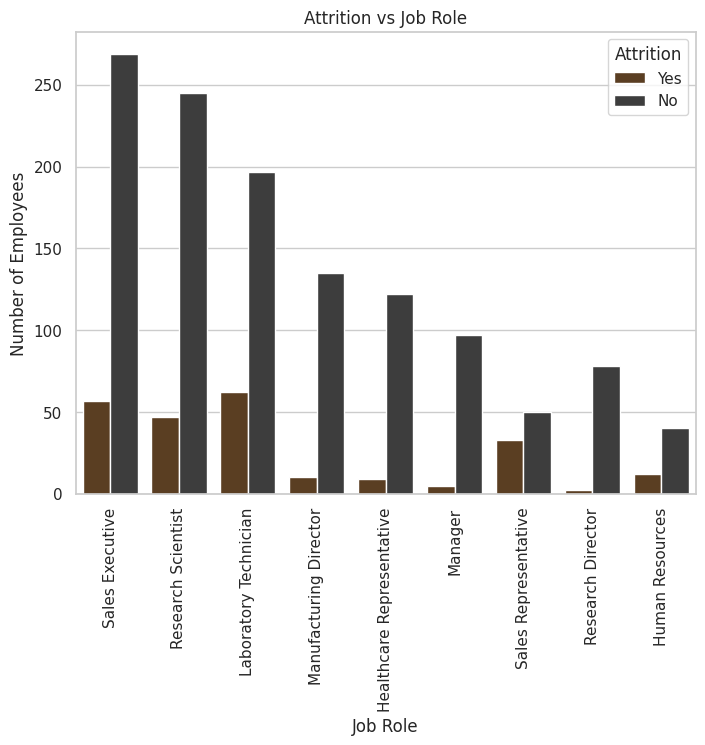

In [ ]:
# Attrition by job role

colors = {'No': '#3d3d3d', 'Yes': '#633e19'}
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='JobRole', hue='Attrition', palette=colors)
plt.title('Attrition vs Job Role')
plt.xticks(rotation=90) # To prevent overlapping of job names
plt.xlabel('Job Role')
plt.ylabel('Number of Employees')
plt.show()

- Job roles like Laboratory Technician and Sales Executive show significantly higher turnover rates.

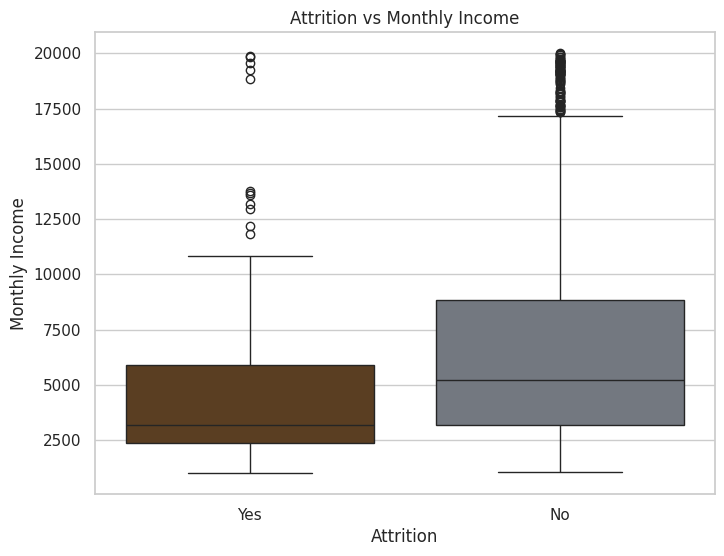

In [ ]:
# Attrition by monthly income

colors = {'No': '#717882', 'Yes': '#633e19'}
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette=colors)
plt.title('Attrition vs Monthly Income')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

- Employees with lower salaries are more likely to quit their jobs.

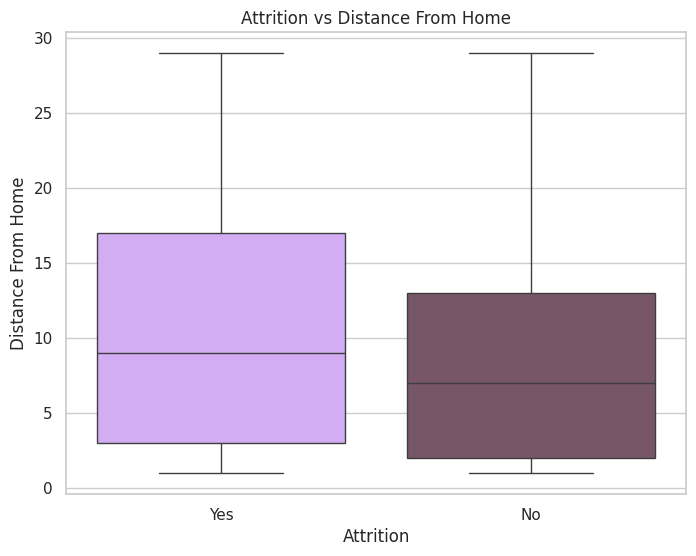

In [ ]:
# Attrition based on distance from home to the workplace

colors = {"No": "#7c5168", "Yes": "#d3a1ff"}
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Attrition', y='DistanceFromHome', palette=colors)
plt.title('Attrition vs Distance From Home')
plt.xlabel('Attrition')
plt.ylabel('Distance From Home')
plt.show()

- Employees who travel longer distances to work tend to leave more often.

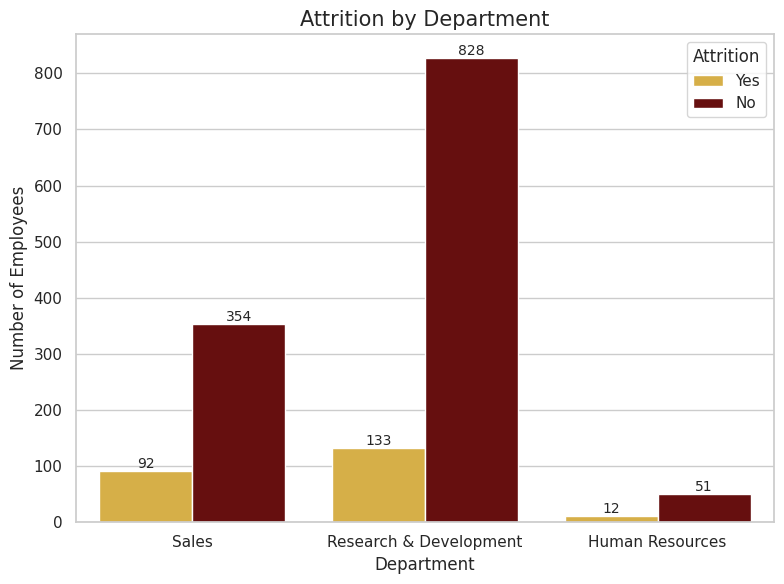

In [ ]:
# Attrition by Department

colors = {'No': '#740001', 'Yes': '#eeba30'}
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df, x="Department", hue="Attrition", palette=colors)
plt.title("Attrition by Department", fontsize=15)
plt.xlabel("Department")
plt.ylabel("Number of Employees")

# To place counts on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10)  # To place counts on top of each bar, and show numbers as integers

plt.tight_layout()
plt.show()

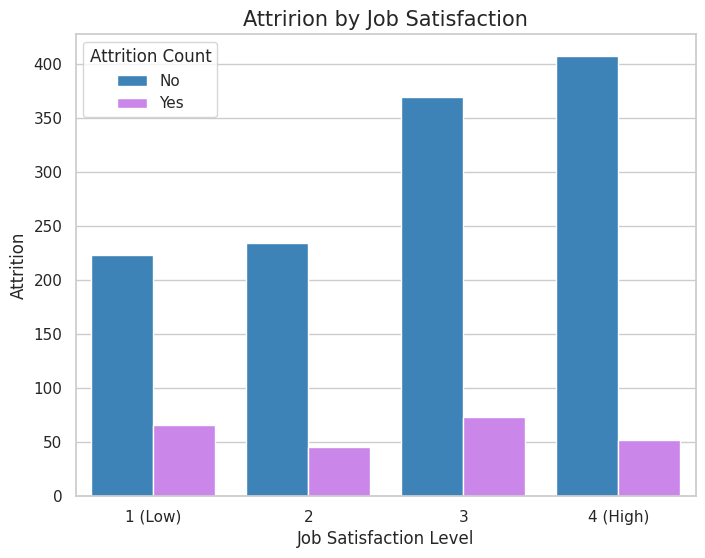

In [ ]:
# Attrition based on job satisfaction

colors = {"No": "#2986cc", "Yes": "#d075f9"}
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="JobSatisfaction", hue="Attrition", palette=colors)
plt.title("Attririon by Job Satisfaction",fontsize=15)
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Attrition")
plt.xticks([0, 1, 2, 3], ['1 (Low)', '2', '3', '4 (High)'])
plt.legend(title='Attrition Count', labels=['No', 'Yes'])
plt.show()

- Some employees may have resigned due to lack of job satisfaction.

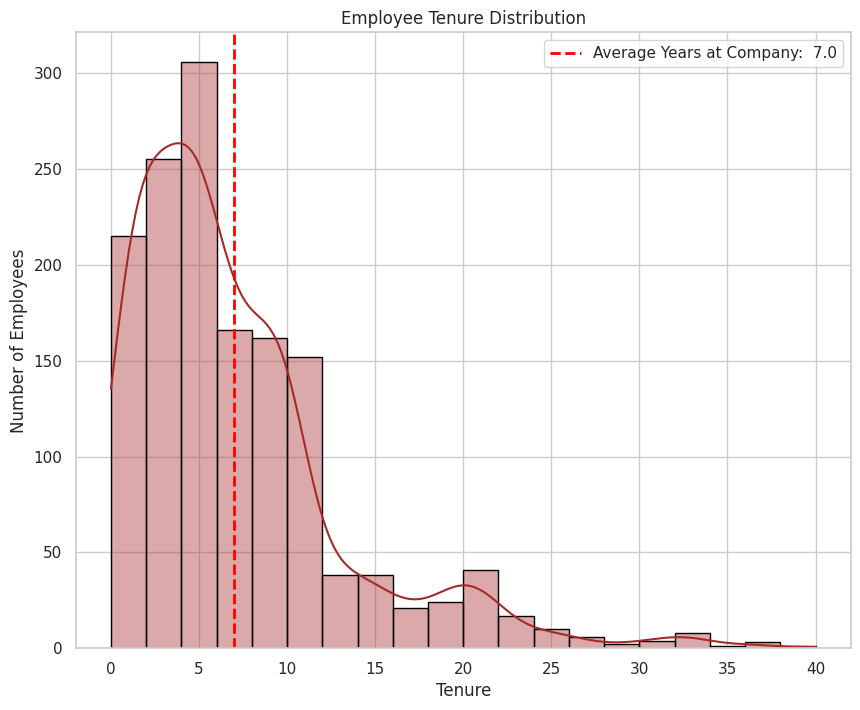

In [ ]:
# Employees' tenure at the company

sns.set_theme(style = "whitegrid")
plt.figure(figsize=(10,8))
sns.histplot(data = df, x = "YearsAtCompany", bins = 20, edgecolor="black", color='brown', kde=True, alpha=0.4)
mean = np.mean(df["YearsAtCompany"])
plt.axvline(mean, color="red", linestyle="--", linewidth="2", label=f"Average Years at Company: {mean: .1f}")
plt.legend()
plt.title("Employee Tenure Distribution")
plt.xlabel("Tenure")
plt.ylabel("Number of Employees")
plt.show()

- The employee tenure histogram reveals a distinctly right-skewed distribution, indicating that most employees have relatively short tenures with the organization. On average, employees have been with the company for approximately seven (7) years.

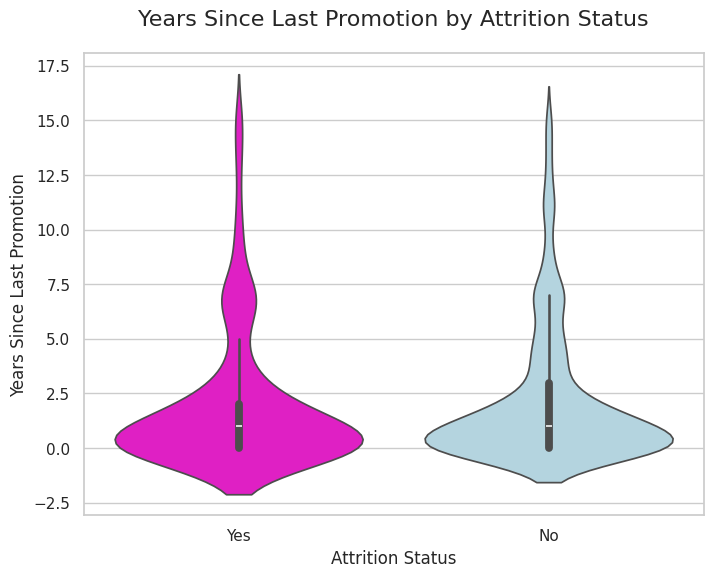

In [ ]:
# Years since last promotion and its correlation with employee attrition

colors = {'No': '#ADD8E6', 'Yes': '#ff00db'}
plt.figure(figsize = (8,6))

sns.violinplot(data=df, x="Attrition", y="YearsSinceLastPromotion",inner="box", palette=colors)

plt.title("Years Since Last Promotion by Attrition Status", fontsize=16, pad=20)
plt.xlabel("Attrition Status", fontsize=12)
plt.ylabel("Years Since Last Promotion", fontsize=12)
plt.show()

- As shown above, delay in promotion clearly indicates the risk of employees leaving the job.
- Between 5 and 10 years, some employees remain with the company despite not receiving a promotion. However, beyond this period, no employees continue to wait for one. This suggests that lack of promotion is a key factor influencing attrition.

## Insight Summary

- The overall employee attrition rate stands at approximately 16% of the total workforce.
1. Attrition vs OverTime
- Employees who work overtime have a higher likelihood of resigning than those who don’t.

2. Attrition vs JobRole
- Job roles such as Laboratory Technician and Sales Executive experience higher turnover rates compared to other positions.

3. Attrition vs MonthlyIncome
- Employees earning lower monthly incomes face a significantly higher risk of attrition.

4. Attrition vs Age
- Younger employees (aged 20–30) are more likely to leave the company compared to older age groups.

5. Attrition vs DistanceFromHome
- Employees who live farther from the workplace are slightly more likely to leave the company.

#**PHASE 3: Data Preprocessing**

In [ ]:
#Make a copy of original data

model_df = df.copy()

In [ ]:
model_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
#Dropping columns that do not add predictive value
model_df = model_df.drop(columns=["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"])

##**Feature Encoding**

In [ ]:
#Encoding the target columns first(Attrition)

model_df["Attrition"] = model_df["Attrition"].replace({
    "No": 0, "Yes": 1,
    2:1, #Converts any 2s to 1
    "Y": 1,
    "N": 0
    })

print("Unique Attriton Values:", model_df["Attrition"].unique())

Unique Attriton Values: [1 0]


In [ ]:
model_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
#To identify categorical columns

categorical_cols = model_df.select_dtypes(include=["object"]).columns.tolist()
categorical_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [ ]:
#Defining column Categories

binary_cols = ["Gender", "Overtime"]  #Binary class (Label Encode)
small_multi_threshold = 6  #Columns with <= 6 unique values (One-Hot Encode)
#High Cardinalitty will be others

#Using for loop to encode categorical columns
for col in categorical_cols:
  if col == "Attrition":
    continue #Already encoded
  unique_vals_count = model_df[col].nunique() #To get count of unique values

  #LabelEncoder for Binary columns
  if col in binary_cols or unique_vals_count == 2:
       if set(model_df[col].unique()) == {0,1}:
          continue
       mapping = {val: idx for idx, val in enumerate(model_df[col].unique())}
       model_df[col] = model_df[col].map(mapping)

  #One-Hot encoder for multi-class
  elif unique_vals_count <= small_multi_threshold:
    dummies = pd.get_dummies(model_df[col], prefix=col, drop_first=True)
    model_df = pd.concat([model_df, dummies], axis=1)
    model_df = model_df.drop(columns=[col])

  #High-Cardinality label Encode
  else:
    model_df[col] = df[col].astype("category").cat.codes

  #To ensure any remaining bolean columns are converted
  bool_cols = model_df.select_dtypes(include=["bool"]).columns
  for col in bool_cols:
    model_df[col] = model_df[col].astype(int)

In [ ]:
print(model_df.shape)
print(model_df.head())

(1470, 38)
   Age  Attrition  DailyRate  DistanceFromHome  Education  \
0   41          1       1102                 1          2   
1   49          0        279                 8          1   
2   37          1       1373                 2          2   
3   33          0       1392                 3          4   
4   27          0        591                 2          1   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2       0          94               3         2   
1                        3       1          61               2         2   
2                        4       1          92               2         1   
3                        4       0          56               3         1   
4                        1       1          40               3         1   

   JobRole  JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
0        7                4           5993        19479                   8   
1      

## **Feature Correlation**

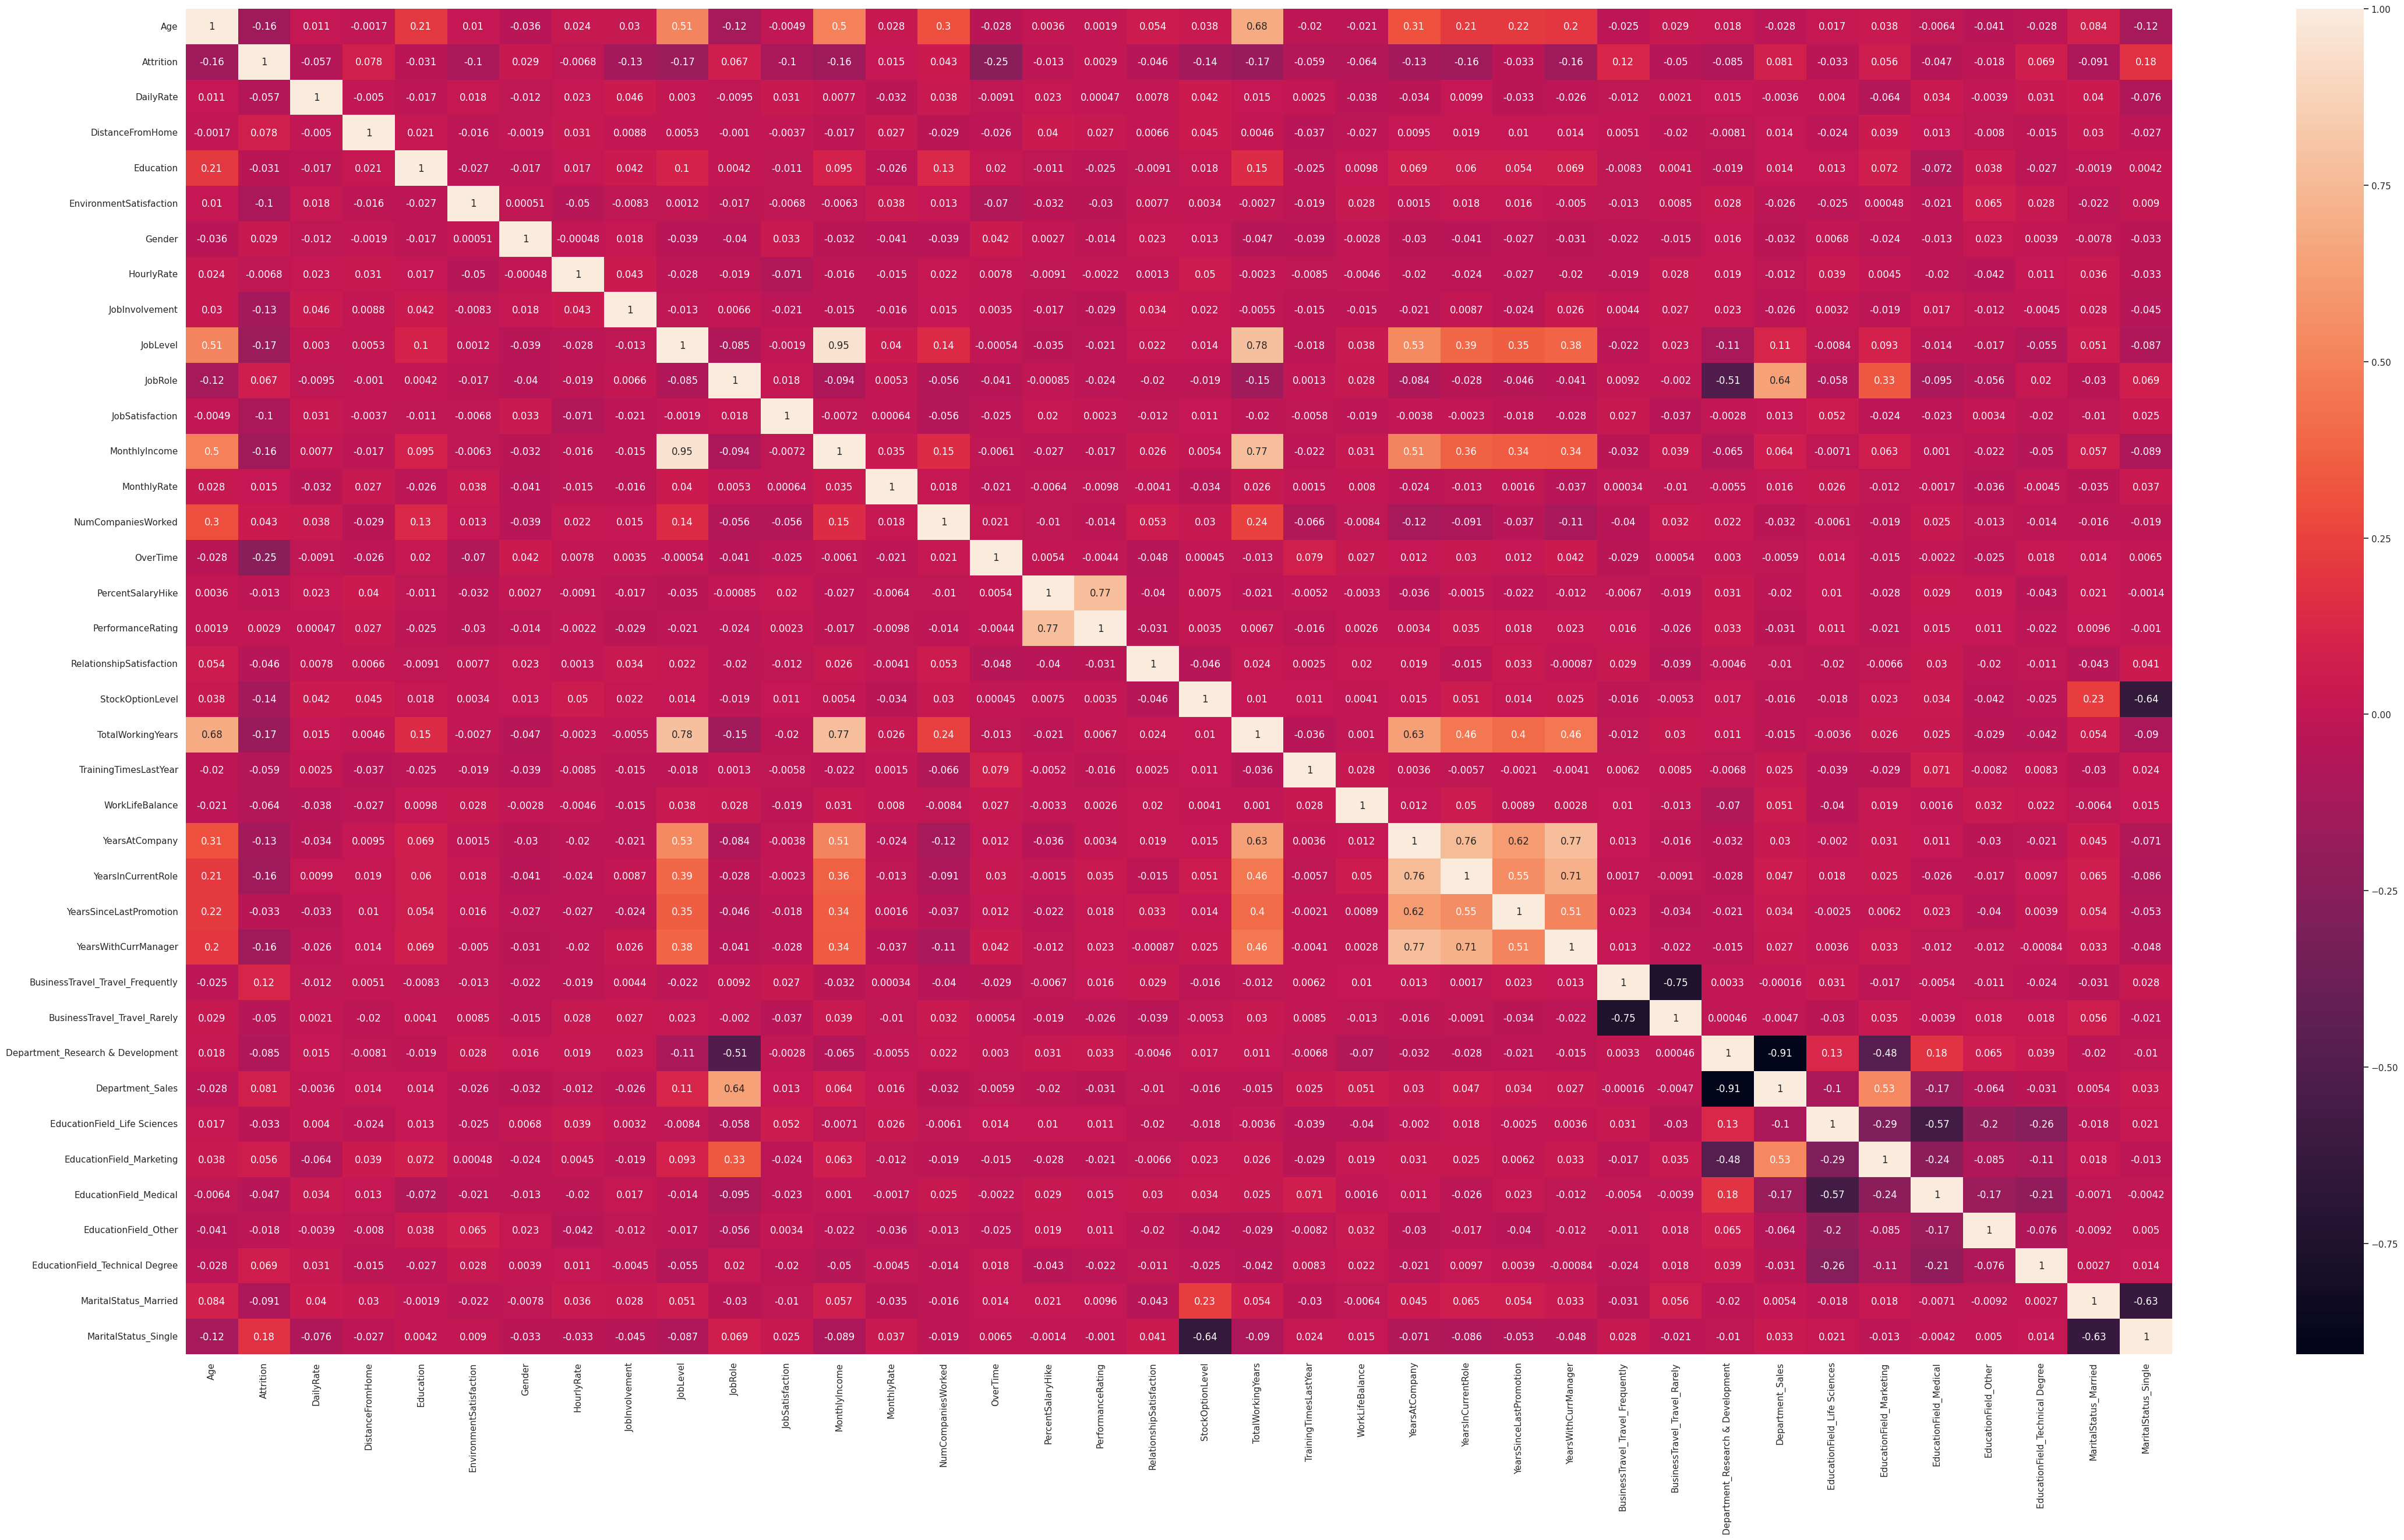

In [ ]:
plt.figure(figsize=(55,30))
sns.heatmap(model_df.corr(), annot=True)

plt.show()

## **Checking for Target Feature Distribution**

In [ ]:
#Handling imbalanced Data with SMOTE

#Count Class Distribution
#print("Before SMOTE:", Counter(y_train))

#smote = SMOTE(random_state=12)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#Force interger again
#y_train_resampled = y_train_resampled.astype(np.int64)

#print("After SMOTE:", Counter(y_train_resampled))

#Plotting Employee Attrition Distribution after SMOTE
#sns.countplot(x=y_train_resampled.map({0: "No", 1: "Yes"}), palette="Set2")
#plt.title("Employee Attrition Distribution After SMOTE")
#plt.xlabel("Attrition (0 = No, 1 = Yes)")
#plt.ylabel("Employee Count")

#plt.show()


#print(y_train_resampled.unique())
#print(y_train_resampled.value_counts())


##**Feature Scaling**

In order for models like Logistic Regression to perform better

In [ ]:
#Scaling Numerical Columns
scaler = StandardScaler()
num_cols = model_df.select_dtypes(include=["int64", "float64"]).columns
model_df[num_cols] = scaler.fit_transform(model_df[num_cols])

## **Insight Summary**

*   All categorical columns were featured encoded to numerical columns using the label encoder
*   Feature correlation showed all input features are unique hence no further feature removal due to repetition
*   All features were scaled using StandardScaler
*   We noticed inbalanced data in the target feature but decided to keep it without SMOTE so it retains its originality thereby maintaining its integrity in the micmiking of real world data and to avoid the introduction of noise into the dataset.





## **Train-Test Split**

 Seperating Dataset for model training and evaluation*

In [ ]:
X = model_df.drop('Attrition', axis=1) #Features
y = model_df['Attrition'].astype(int) #Target

#Force target to int
y = y.replace({2:1}).astype(np.int64) #Convert 2 to 1
print("Unique Attrition Values:", y.unique())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, stratify=y) #Stratify y ensures the proportion of classes is maintaines in both training and test sets

Unique Attrition Values: [1 0]


In [ ]:
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,-1.224745,1.383138,0.379672,-0.057788,7,1.153254,-0.108350,0.726020,2.125136,-1.591746,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,-0.481859,0.639841,-1.374051,1.515244,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.918921,1.458650
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,0.816497,-0.240677,-1.026167,-0.057788,6,-0.660853,-0.291719,1.488876,-0.678049,0.628241,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,2.075297,-1.562889,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,1.088232,-0.685565
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,0.816497,1.284725,-1.026167,-0.961486,2,0.246200,-0.937654,-1.674841,1.324226,-1.591746,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,-0.481859,0.639841,0.727775,-0.659960,-0.837490,-0.348255,-0.679141,4.114223,-0.314093,-0.918921,1.458650
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-1.224745,-0.486709,0.379672,-0.961486,6,0.246200,-0.763634,1.243211,-0.678049,-1.591746,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,2.075297,-1.562889,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,1.088232,-0.685565
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,0.816497,-1.274014,0.379672,-0.961486,2,-0.660853,-0.644858,0.325900,2.525591,0.628241,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,-0.481859,0.639841,0.727775,-0.659960,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,1.088232,-0.685565


In [ ]:
y.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [ ]:
y.value_counts()

,count
Attrition,
0,1233
1,237


## **Phase 4: Modeling and Evaluation Metrics**

### Training

**Logistic Regression Model**

In [ ]:
log = LogisticRegression()

log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
log_preds = log.predict(X_test)

In [ ]:
accuracy_score(y_test, log_preds)

0.8741496598639455

In [ ]:
print(classification_report(y_test, log_preds))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.69      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294



**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can change kernel to 'linear', 'poly', etc.


In [ ]:
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
svm_pred = svm_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, svm_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8673469387755102


In [ ]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       247
           1       1.00      0.17      0.29        47

    accuracy                           0.87       294
   macro avg       0.93      0.59      0.61       294
weighted avg       0.89      0.87      0.83       294



**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
dt_pred = tree_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, dt_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7925170068027211


In [ ]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       247
           1       0.33      0.30      0.31        47

    accuracy                           0.79       294
   macro avg       0.60      0.59      0.60       294
weighted avg       0.78      0.79      0.79       294



**XG Boost**

In [ ]:
boost = XGBClassifier(random_state=6)

boost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
boost_preds = boost.predict(X_test)

In [ ]:
accuracy_score(y_test, boost_preds)

0.8537414965986394

In [ ]:
print(classification_report(y_test, boost_preds))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.58      0.32      0.41        47

    accuracy                           0.85       294
   macro avg       0.73      0.64      0.66       294
weighted avg       0.83      0.85      0.84       294



**Random Forest**

In [ ]:
forest = RandomForestClassifier(random_state=10)

forest.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [ ]:
forest_preds = forest.predict(X_test)

In [ ]:
accuracy_score(y_test, forest_preds)

0.8503401360544217

In [ ]:
print(classification_report(y_test, forest_preds))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       247
           1       0.71      0.11      0.19        47

    accuracy                           0.85       294
   macro avg       0.78      0.55      0.55       294
weighted avg       0.83      0.85      0.80       294



**Accuracy**

The percentage of total predictions the model got right

**accuracy = correct predictions/total predictions**

It is *not reliable* when classes are *imbalanced*

In [ ]:
con_matrix = confusion_matrix(y_test, forest_preds)
con_matrix

array([[245,   2],
       [ 42,   5]])

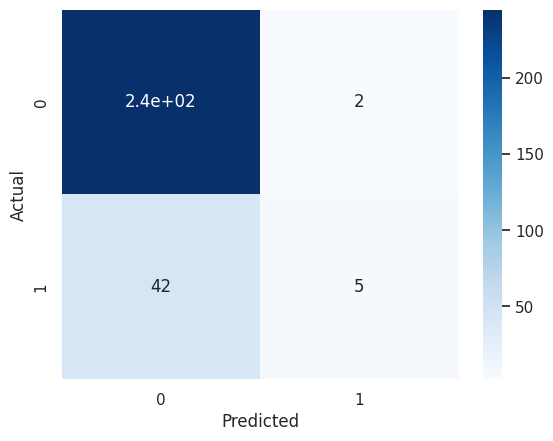

In [ ]:
sns.heatmap(con_matrix, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- 245 – True Negative: The number of employees who were predicted to stay and actually did stay.
- 2 – False Positive: The number of employees who were predicted to leave but actually stayed.
- 42 – False Negative: The number of employees who were predicted to stay but actually left.
- 5 – True Positive: The number of employees who were predicted to leave and actually did leave.


---

### **Precision**

**Formula:**  
**Precision = TP / (TP + FP)**

**Interpretation in Employee Attrition:**  
**Of all employees predicted to leave, how many actually left?**

This tells us how accurate our model is when it predicts that an employee will leave. A high precision means that most of the employees flagged as likely to leave did, in fact, leave.


In [ ]:
6/(6 + 2)

0.75

---

## **Recall**
**Formula:**
**Recall = TP / (TP + FN)**

**Interpretation in Employee Attrition:**

Of all employees who actually left, how many did the model correctly predict would leave?

This metric tells you how well your model identifies employees who are at risk of leaving. A higher recall means the model is better at catching true cases of attrition


In [ ]:
6/(6 + 41)

0.1276595744680851

## **F1 Score**
Harmonic mean of precision and recall

This is the best metric for imbalanced datasets

## **ROC Curve**
Receiver Operating Characteristic Curve

This curve relationship between False Positive Rate (FPR) and True Positive Rate (TPR)

It works with probabilities

In [ ]:
forest_prob = forest.predict_proba(X_test)[:, 1]

forest_prob

array([0.37, 0.16, 0.24, 0.1 , 0.05, 0.04, 0.06, 0.19, 0.13, 0.13, 0.04,
       0.16, 0.04, 0.04, 0.13, 0.04, 0.53, 0.11, 0.11, 0.03, 0.18, 0.23,
       0.05, 0.11, 0.04, 0.09, 0.12, 0.24, 0.07, 0.07, 0.5 , 0.03, 0.11,
       0.16, 0.15, 0.12, 0.16, 0.09, 0.08, 0.1 , 0.19, 0.08, 0.07, 0.  ,
       0.12, 0.03, 0.18, 0.34, 0.2 , 0.12, 0.11, 0.18, 0.19, 0.11, 0.14,
       0.08, 0.09, 0.15, 0.05, 0.02, 0.4 , 0.11, 0.3 , 0.04, 0.05, 0.09,
       0.07, 0.18, 0.13, 0.  , 0.18, 0.14, 0.25, 0.07, 0.04, 0.54, 0.07,
       0.17, 0.07, 0.03, 0.24, 0.06, 0.18, 0.1 , 0.04, 0.18, 0.12, 0.13,
       0.13, 0.2 , 0.1 , 0.37, 0.06, 0.07, 0.19, 0.09, 0.28, 0.44, 0.43,
       0.41, 0.23, 0.16, 0.11, 0.04, 0.19, 0.05, 0.32, 0.41, 0.13, 0.81,
       0.03, 0.02, 0.19, 0.08, 0.22, 0.13, 0.11, 0.31, 0.22, 0.15, 0.11,
       0.23, 0.15, 0.11, 0.23, 0.12, 0.05, 0.41, 0.03, 0.09, 0.48, 0.43,
       0.06, 0.09, 0.18, 0.05, 0.06, 0.13, 0.12, 0.33, 0.19, 0.07, 0.09,
       0.19, 0.04, 0.03, 0.12, 0.11, 0.11, 0.06, 0.

In [ ]:
auc_score = roc_auc_score(y_test, forest_prob)

auc_score

np.float64(0.7765526746489793)

If auc score = **1**, the classifier is **perfect**

If auc score = **0.5**, the classifier is **guessing randomly**

If auc score **< 0.5**, the classifier is **bad**

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, forest_prob)


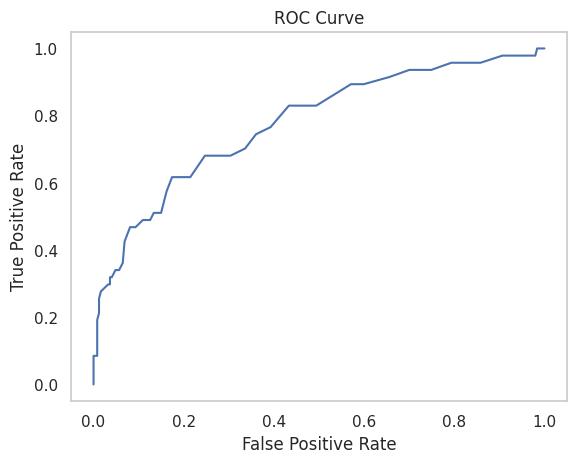

In [ ]:
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid(False)
plt.show()


In [ ]:
forest_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_test

,Attrition
1167,1
1062,0
293,1
445,0
1468,0
...,...
1427,0
387,0
1048,0
72,0


## **Feature Importance**


It refers to a set of techniques used to determine which features (variables, columns, or predictors) in a dataset have the most influence on a machine learning model’s predictions.

In [ ]:
importances = forest.feature_importances_

importances

array([0.06285059, 0.05230623, 0.04477939, 0.0216357 , 0.02676098,
       0.00943215, 0.04452396, 0.02420881, 0.03054559, 0.0295497 ,
       0.0293912 , 0.07984139, 0.05020937, 0.03441335, 0.05400869,
       0.03277188, 0.0057746 , 0.02107007, 0.0279044 , 0.05203903,
       0.02550351, 0.02540523, 0.04055578, 0.02415041, 0.02488595,
       0.03210791, 0.0138088 , 0.00779199, 0.00689258, 0.00813387,
       0.00843352, 0.0059798 , 0.00603455, 0.00315743, 0.00857257,
       0.00807031, 0.0164987 ])

In [ ]:
features = X.columns
features

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

In [ ]:
importance_df = pd.DataFrame({'Feature': features, 'Importance':importances})
importance_df.sort_values(by="Importance", ascending=False, inplace=True)

In [ ]:
importance_df.head(35)

,Feature,Importance
11,MonthlyIncome,0.079841
0,Age,0.062851
14,OverTime,0.054009
1,DailyRate,0.052306
19,TotalWorkingYears,0.052039
12,MonthlyRate,0.050209
2,DistanceFromHome,0.044779
6,HourlyRate,0.044524
22,YearsAtCompany,0.040556
13,NumCompaniesWorked,0.034413


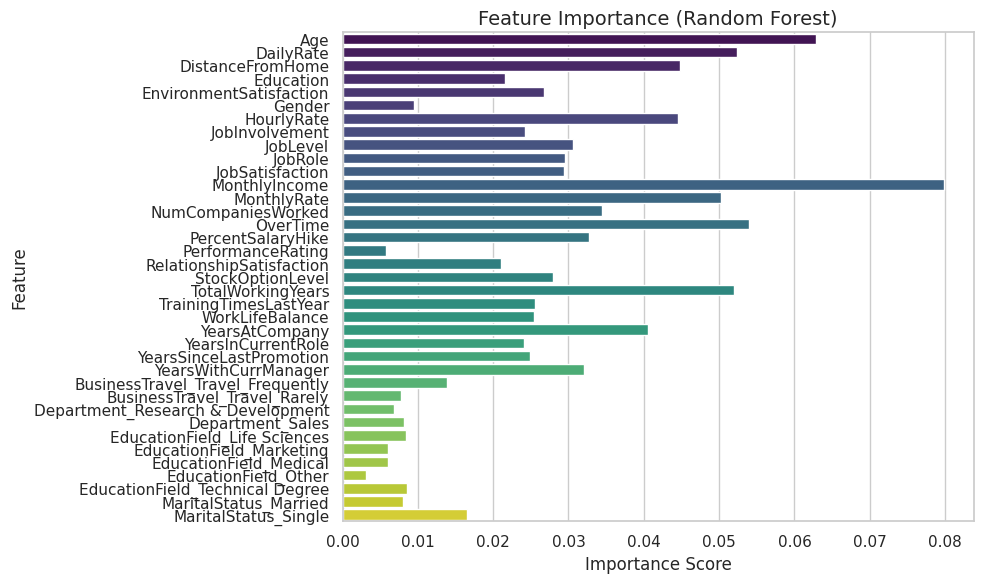

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance (Random Forest)", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

This shows that our most important feature is the *Mothly Income*, ffollowed by *Age* and *Daily Rate*

## Hyperparameter Tunning

**Random Forest H.T**

In [ ]:
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#define a parameter grid

param_grid = {'n_estimators':[100, 200, 300], 'max_depth': [None, 10, 15, 20], 'min_samples_split':[2, 3, 4, 5], 'min_samples_leaf':[1, 2]}

In [ ]:
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, scoring='r2', cv=3, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 15, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [ ]:
# looking for the best parameters

grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [ ]:
tuned_rf_model = grid_search.best_estimator_

In [ ]:
# predicting the tunded model

tuned_rf_pred = tuned_rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, tuned_rf_pred)
rounded_accuracy = round(accuracy, 2)
print(f"Accuracy of the tuned model: {rounded_accuracy}")

Accuracy of the tuned model: 0.86


For Random Forest HT, We observed a slight improvement of `0.01` in the accuracy score after performing hyperparameter tuning compared to the initial model.

In [ ]:
# Evaluate the model's final performance
print("\n--- Test Set Evaluation ---")
print(f"Accuracy of the tuned Random Forest Model is: {accuracy_score(y_test, tuned_rf_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, tuned_rf_pred))


--- Test Set Evaluation ---
Accuracy of the tuned Random Forest Model is: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       247
           1       1.00      0.15      0.26        47

    accuracy                           0.86       294
   macro avg       0.93      0.57      0.59       294
weighted avg       0.88      0.86      0.82       294



**SVM H.T**

In [ ]:
svm_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}


In [ ]:
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='f1', cv=3, n_jobs=-1)

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

svm_model = SVC()
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='f1', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             scoring='f1')

In [ ]:
# Get the best model
tuned_model_svm = grid_search.best_estimator_

# Make predictions on the unseen test data
tuned_svm_pred = tuned_model_svm.predict(X_test)

# Evaluate the model's final performance
print("\n--- Test Set Evaluation ---")
print(f"Accuracy of the tuned SVM Model is: {accuracy_score(y_test, tuned_svm_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, tuned_svm_pred))


--- Test Set Evaluation ---
Accuracy of the tuned SVM Model is: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.92       247
           1       0.67      0.34      0.45        47

    accuracy                           0.87       294
   macro avg       0.78      0.65      0.69       294
weighted avg       0.85      0.87      0.85       294



For SVM HT, We observed a slight improvement of `0.01` in the accuracy score after performing hyperparameter tuning compared to the initial model.

**XGBoost H.T**

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 3, 5]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'scale_pos_weight': [1, 3, 5],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='f1')

In [ ]:
# Get the best model
tuned_model_xgb = grid_search.best_estimator_

# Make predictions on the unseen test data
tuned_xgb_pred = tuned_model_xgb.predict(X_test)

In [ ]:
# Evaluate the model's final performance
print("\n--- Test Set Evaluation ---")
print(f"Accuracy of the tuned XGBoost Model is: {accuracy_score(y_test, tuned_xgb_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, tuned_xgb_pred))


--- Test Set Evaluation ---
Accuracy of the tuned XGBoost Model is: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       247
           1       0.56      0.32      0.41        47

    accuracy                           0.85       294
   macro avg       0.72      0.64      0.66       294
weighted avg       0.83      0.85      0.83       294



**Logistic Regression H.T**

In [ ]:
# Define the model
logr = LogisticRegression(solver='liblinear')

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced']
}

# Run GridSearchCV
grid_search = GridSearchCV(logr, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']},
             scoring='f1')

In [ ]:
# Get the best model
tuned_model_lr = grid_search.best_estimator_

# Make predictions on the unseen test data
tuned_lr_pred = tuned_model_lr.predict(X_test)

In [ ]:
# Evaluate the model's final performance
print("\n--- Test Set Evaluation ---")
print(f"Accuracy of the tuned Logistic Regreesion Model is: {accuracy_score(y_test, tuned_lr_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, tuned_lr_pred))


--- Test Set Evaluation ---
Accuracy of the tuned Logistic Regreesion Model is: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       247
           1       0.75      0.38      0.51        47

    accuracy                           0.88       294
   macro avg       0.82      0.68      0.72       294
weighted avg       0.87      0.88      0.86       294



**Decision Tree H.T**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the model
dtree = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [ ]:
# Get the best model
tuned_model_dt = grid_search.best_estimator_

# Make predictions on the unseen test data
tuned_dt_pred = tuned_model_dt.predict(X_test)

In [ ]:
# Evaluate the model's final performance
print("\n--- Test Set Evaluation ---")
print(f"Accuracy of the tuned Decision Tree Model is: {accuracy_score(y_test, tuned_dt_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, tuned_dt_pred))


--- Test Set Evaluation ---
Accuracy of the tuned Decision Tree Model is: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       247
           1       0.43      0.28      0.34        47

    accuracy                           0.83       294
   macro avg       0.65      0.60      0.62       294
weighted avg       0.80      0.83      0.81       294



## Model Accuracy Comparison After Hyperparameter Tuning

In [ ]:
model_names = ['Random Forest', 'SVM', 'XGBoost', 'Decision Tree', 'Logistic Regression']


accuracies = [accuracy_score(y_test, tuned_rf_pred),
 accuracy_score(y_test, tuned_svm_pred),
  accuracy_score(y_test, tuned_xgb_pred),
   accuracy_score(y_test, tuned_dt_pred),
    accuracy_score(y_test, tuned_lr_pred)]

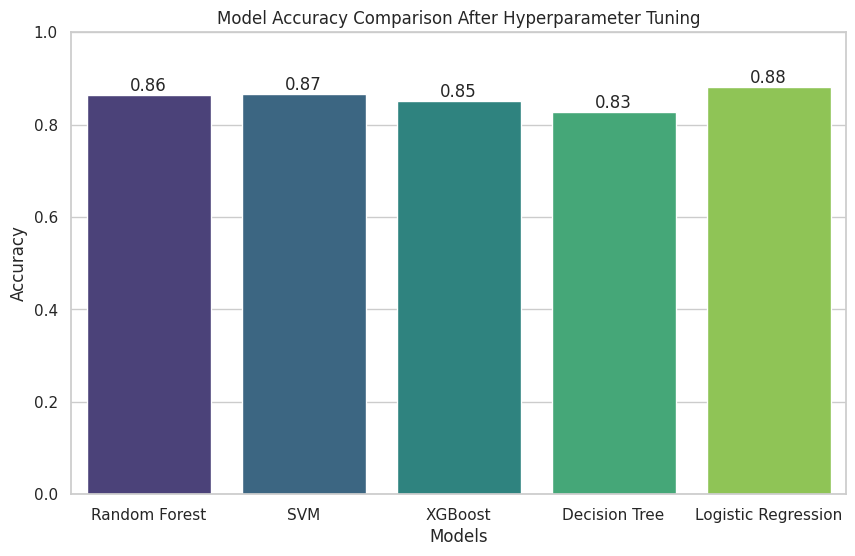

In [ ]:
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=model_names, y=accuracies, palette="viridis")

# Annotate bars with values
for bar in ax.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}',
             ha='center', va='bottom', fontsize=12)

plt.title("Model Accuracy Comparison After Hyperparameter Tuning")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xlabel("Models")
plt.show()

## **Extracting F1-Score from Classification Report to Plot a Bar Chart**

In [ ]:
#Assigning a variable to the tuned model
y1 = classification_report(y_test, tuned_rf_pred)
y2 = classification_report(y_test, tuned_svm_pred)
y3 = classification_report(y_test, tuned_xgb_pred)
y4 = classification_report(y_test, tuned_dt_pred)
y5 = classification_report(y_test, tuned_lr_pred)

In [ ]:
#Converting the Classification Report to Strings for easy extraction of F1-Score only

from io import StringIO

classification_reports = {
    'Tuned Random Forest': y1,
    'Tuned SVM': y2,
    'Tuned XGBoost': y3,
    'Tuned Decision Tree': y4,
    'Tuned Logistic Regression': y5
}

for model_name, report_string in classification_reports.items():
    print(f"--- {model_name} ---")
    lines = report_string.split('\n')

    class_0_line = None
    for line in lines:
        if line.strip().startswith('0'):
            class_0_line = line.split()
            break

    class_1_line = None
    for line in lines:
        if line.strip().startswith('1'):
            class_1_line = line.split()
            break

    if class_0_line and len(class_0_line) > 3:
        f1_score_0 = float(class_0_line[3])
        print(f"F1-score for Attrition (No): {f1_score_0:.2f}")
    else:
        print(f"Could not find the classification report line for Attrition '0' for {model_name}.")

    if class_1_line and len(class_1_line) > 3:
        f1_score_1 = float(class_1_line[3])
        print(f"F1-score for Attrition (Yes): {f1_score_1:.2f}")
    else:
        print(f"Could not find the classification report line for class '1' for {model_name}.")
    print("-" * (len(model_name) + 6)) # Separator

--- Tuned Random Forest ---
F1-score for Attrition (No): 0.93
F1-score for Attrition (Yes): 0.26
-------------------------
--- Tuned SVM ---
F1-score for Attrition (No): 0.92
F1-score for Attrition (Yes): 0.45
---------------
--- Tuned XGBoost ---
F1-score for Attrition (No): 0.91
F1-score for Attrition (Yes): 0.41
-------------------
--- Tuned Decision Tree ---
F1-score for Attrition (No): 0.90
F1-score for Attrition (Yes): 0.34
-------------------------
--- Tuned Logistic Regression ---
F1-score for Attrition (No): 0.93
F1-score for Attrition (Yes): 0.51
-------------------------------


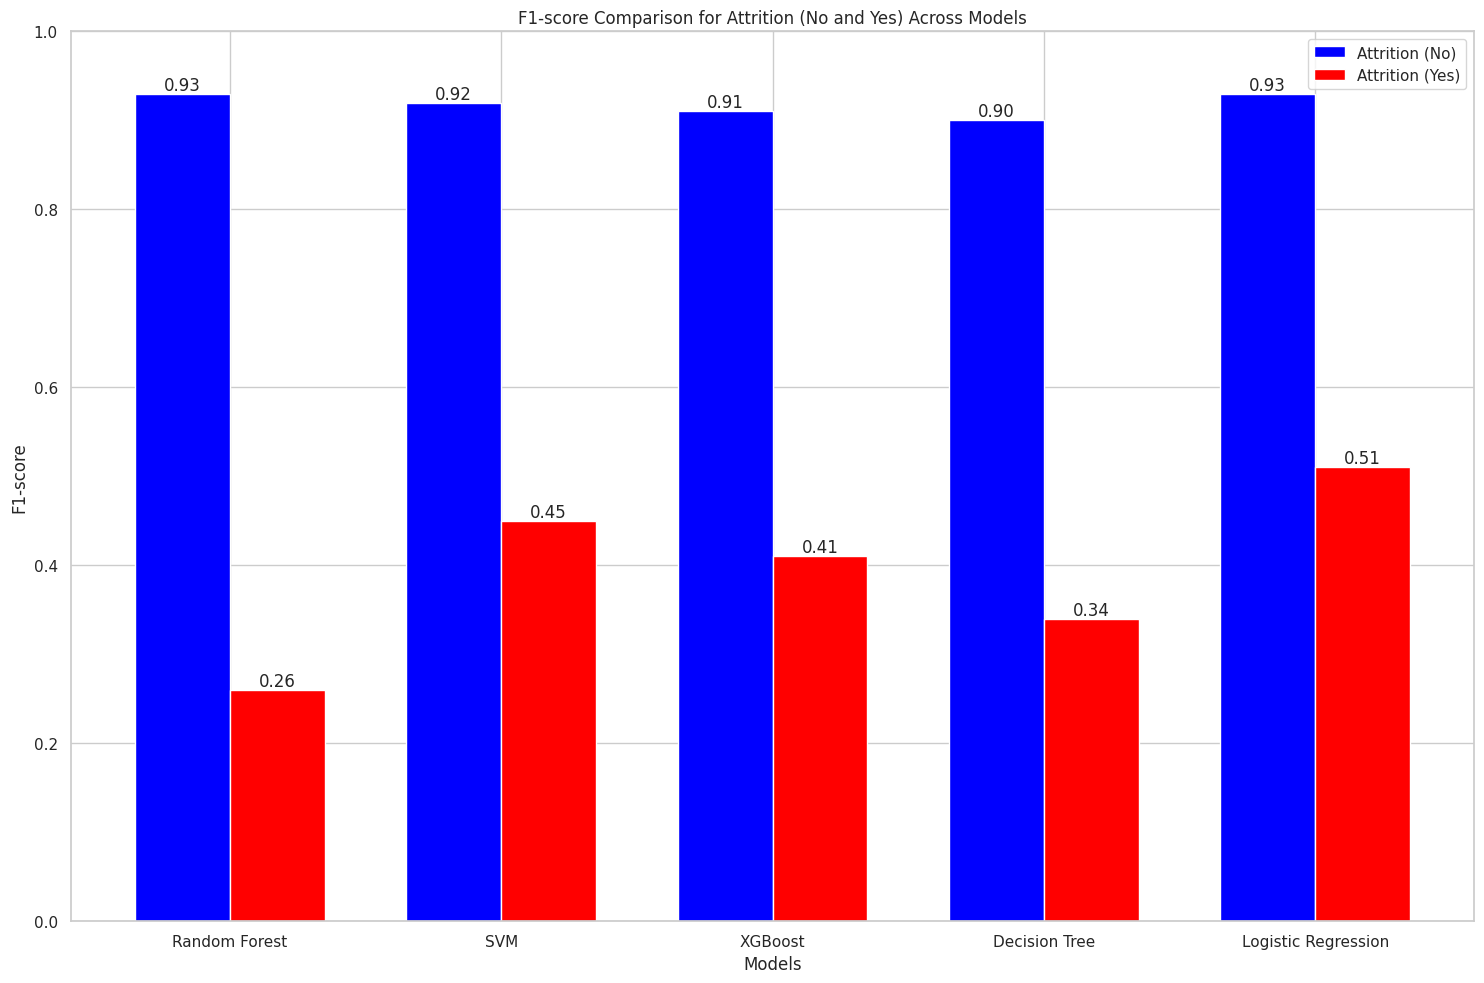

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # Import seaborn

f1_scores_no = []
f1_scores_yes = []

classification_reports = {
    'Random Forest': y1,
    'SVM': y2,
    'XGBoost': y3,
    'Decision Tree': y4,
    'Logistic Regression': y5
}

for model_name, report_string in classification_reports.items():
    lines = report_string.split('\n')
    class_0_line = None
    class_1_line = None

    for line in lines:
        if line.strip().startswith('0'):
            class_0_line = line.split()
        elif line.strip().startswith('1'):
            class_1_line = line.split()

    if class_0_line and len(class_0_line) > 3:
        f1_scores_no.append(float(class_0_line[3]))
    else:
        f1_scores_no.append(0.0) # Append 0 if data is missing

    if class_1_line and len(class_1_line) > 3:
        f1_scores_yes.append(float(class_1_line[3]))
    else:
        f1_scores_yes.append(0.0) # Append 0 if data is missing

bar_width = 0.35
index = np.arange(len(model_names))

plt.figure(figsize=(15, 10))
bar1 = plt.bar(index, f1_scores_no, bar_width, label='Attrition (No)', color='blue')
bar2 = plt.bar(index + bar_width, f1_scores_yes, bar_width, label='Attrition (Yes)', color='red')

plt.xlabel('Models')
plt.ylabel('F1-score')
plt.title('F1-score Comparison for Attrition (No and Yes) Across Models')
plt.xticks(index + bar_width / 2, model_names)
plt.legend(loc="best") # Added loc="best" for better legend placement
plt.ylim(0, 1)
plt.tight_layout()

# Add F1-score values on top of the bars
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2f}',
                 ha='center', va='bottom')

plt.show()

# To save the plot as a PNG file
#plt.savefig('f1_score_comparison.png')

## **Insight Summary**

1.   The accuracies of Random Forest, SVM, XGBoost, Decision Tree and Logistic Regression Models increased by 0.01, 0.01, 0.01, 0.03, and 0.01 respectively after model hyperparameter tuning.
2. The Logistic Regression model has the highest F1-score for Attrition (No and Yes) prediction at 0.93 and 0.51 respectively.

3. The LOGISTIC REGRESSION MODEL therefore shows the best metric for predicting Employee Attrition as seen in this case study

In [ ]:
import joblib

# Save the tuned Logistic Regression model
joblib.dump(tuned_model_lr, 'tuned_model_lr.pkl')

['tuned_model_lr.pkl']

In [ ]:
import joblib

# Save the scaler
joblib.dump(scaler, 'Employee_attrition_scaler.pkl')

['Employee_attrition_scaler.pkl']

#**Deployment**

*Saving Model and Encoders*

In [ ]:
#Extracting the model
#Since our tuned Regression model performed best , we will be deploying it
joblib.dump(tuned_model_lr, 'Employee_attrition_model.pkl')

['Employee_attrition_model.pkl']

In [ ]:
#Extracting encoders

# Recreating encoder information based on the preprocessing logic
# This time, explicitly store mappings and column names in standard Python objects

# Identify binary columns and their mappings
binary_cols = ["Gender", "OverTime"]
label_mappings = {}
if "Gender" in df.columns:
    # Map original string values to 0 and 1
    label_mappings["Gender"] = {"Female": 0, "Male": 1}
if "OverTime" in df.columns:
    # Map original string values to 0 and 1
    label_mappings["OverTime"] = {"No": 0, "Yes": 1}


# Identify columns that were one-hot encoded
# Based on the original notebook logic, these were the object columns
# with more than 2 unique values (excluding the explicitly binary ones)
original_categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
# Remove 'Attrition' as it was the target and handled separately
if 'Attrition' in original_categorical_cols:
    original_categorical_cols.remove('Attrition')

onehot_columns = []
small_multi_threshold = 6 # Re-using the threshold from the notebook

for col in original_categorical_cols:
    if col not in binary_cols:
        if df[col].nunique() > 2 and df[col].nunique() <= small_multi_threshold:
             onehot_columns.append(col)
        elif df[col].nunique() > small_multi_threshold:
             # Assuming high cardinality columns were label encoded as cat.codes
             # Need to save the categories for these as well if cat.codes was used
             # For robustness, explicitly save categories or a mapping
             # For this example, let's assume only one-hot and simple label encoding for binary
             pass # Skip high cardinality for now based on previous error context


# High Cardinality columns (if any were encoded - based on notebook logic)
# If cat.codes was used, we would ideally save the categories list here
high_card_cols = [col for col in original_categorical_cols if col not in binary_cols and col not in onehot_columns and df[col].nunique() > small_multi_threshold]
# For now, we'll save just the column names. A more robust solution might need to save categories.


# Combine all encoding information into a dictionary
encoder = {
    "label_mappings": label_mappings, # Explicit mappings for binary cols
    "onehot_columns": onehot_columns,   # List of original columns to one-hot encode
    "high_card_cols": high_card_cols, # List of original high cardinality columns
    "binary_cols": binary_cols # List of original binary columns
}

# Save the updated encoder information
joblib.dump(encoder, "Employee_attrition_encoder.pkl")
print("Encoders saved successfully as Employee_attrition_encoder.pkl!")
print("Contents summary:")
print(encoder)

Encoders saved successfully as Employee_attrition_encoder.pkl!
Contents summary:
{'label_mappings': {'Gender': {'Female': 0, 'Male': 1}, 'OverTime': {'No': 0, 'Yes': 1}}, 'onehot_columns': ['BusinessTravel', 'Department', 'EducationField', 'MaritalStatus'], 'high_card_cols': ['JobRole'], 'binary_cols': ['Gender', 'OverTime']}


In [ ]:
!pip install streamlit

In [ ]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏
up to date, audited 23 packages in 1s
⠏
⠏3 packages are looking for funding
⠏  run `npm fund` for details
⠏
2 high severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠏

In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import pickle
import joblib

# ALL_FEATURES and CATEGORICAL_COLS lists will be needed later for preprocessing

ALL_FEATURES = ['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'MaritalStatus_Married', 'MaritalStatus_Single']

CATEGORICAL_COLS = ['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

#Load the model and preprocessors
@st.cache_resource #tells Streamlit to load the model once and save into cache memory for future reuse
def load_assets():
    # Use joblib.load consistently
    try:
        model = joblib.load('tuned_model_lr.pkl')
        scaler = joblib.load('Employee_attrition_scaler.pkl')
        encoders = joblib.load('Employee_attrition_encoders.pkl')
        X_train_columns = joblib.load('X_train_columns.pkl') # Load the training column order
        return model, scaler, encoders, X_train_columns
    except FileNotFoundError:
        st.error("Error: Model or preprocessor files not found. Make sure 'tuned_model_lr.pkl', 'Employee_attrition_scaler.pkl', 'Employee_attrition_encoders.pkl', and 'X_train_columns.pkl' are in the same directory.")
        st.stop() # Stop the app if files are not found
    except Exception as e:
        st.error(f"An error occurred during loading assets: {e}")
        st.stop()

model, scaler, encoders, X_train_columns = load_assets()

st.title("Employee Attrition Prediction")

st.write("""
This app predicts whether an employee is likely to leave the company based on their details such as personal, employment history, compensation and other factors.
""")

# Stop execution after loading assets (for debugging or initial check)
# Uncomment the line below to stop the app here
# st.stop()


# Inject small CSS to improve look
st.markdown(
    """
    <style>
    .stApp { background: linear-gradient(180deg, #f7f9fc 0%, #ffffff 100%); }
    .card { background: white; padding: 12px; border-radius: 8px; box-shadow: 0 2px 6px rgba(0,0,0,0.08); }
    .section-title { color: #0f172a; font-weight:600; }
    </style>
    """,
    unsafe_allow_html=True,
)


# Create input fields for each feature
st.header("Employee Information")

# Organize inputs into columns
col1, col2, col3, col4 = st.columns(4)

with col1:
    st.subheader("Personal Details")
    age = st.slider("Age", min_value=18, max_value=60, value=30)
    gender = st.selectbox("Gender", ["Female", "Male"]) # Use original labels for user
    marital_status = st.selectbox("Marital Status", ["Single", "Married", "Divorced"]) # Use original labels
    distance_from_home = st.slider("Distance From Home (miles)", 1, 29, 5)
    education = st.selectbox("Education Level", [1, 2, 3, 4, 5], format_func=lambda x: {1: 'Below College',
        2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}.get(x)) # Use original labels and encoded values

with col2:
    st.subheader("Employment Details")
    department = st.selectbox("Department", ["Sales", "Research & Development", "Human Resources"]) # Use original labels
    job_role = st.selectbox("Job Role", ['Sales Executive', 'Research Scientist', 'Laboratory Technician',
        'Manufacturing Director', 'Healthcare Representative', 'Manager',
        'Sales Representative', 'Research Director', 'Human Resources']) # Use original labels
    job_level = st.slider("Job Level", 1, 5, 1)
    job_involvement = st.selectbox("Job Involvement", [1, 2, 3, 4], format_func=lambda x: {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}.get(x)) # Use original labels and encoded values
    job_satisfaction = st.selectbox("Job Satisfaction", [1, 2, 3, 4], format_func=lambda x: {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}.get(x)) # Use original labels and encoded values
    environment_satisfaction = st.selectbox("Environment Satisfaction", [1, 2, 3, 4], format_func=lambda x: {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}.get(x)) # Use original labels and encoded values
    relationship_satisfaction = st.selectbox("Relationship Satisfaction", [1, 2, 3, 4], format_func=lambda x: {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}.get(x)) # Use original labels and encoded values
    work_life_balance = st.selectbox("Work Life Balance", [1, 2, 3, 4], format_func=lambda x: {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}.get(x)) # Use original labels and encoded values

with col3:
    st.subheader("Compensation")
    daily_rate = st.number_input("Daily Rate", min_value=100, max_value=1500, value=800)
    hourly_rate = st.number_input("Hourly Rate", min_value=30, max_value=100, value=65)
    monthly_income = st.number_input("Monthly Income", min_value=1000, max_value=20000, value=6500)
    monthly_rate = st.number_input("Monthly Rate", min_value=2000, max_value=27000, value=14000)
    percent_salary_hike = st.slider("Percent Salary Hike", 11, 25, 15)
    stock_option_level = st.slider("Stock Option Level", 0, 3, 0)

with col4:
    st.subheader("Work History")
    total_working_years = st.slider("Total Working Years", 0, 40, 10)
    training_times_last_year = st.slider("Training Times Last Year", 0, 6, 3)
    years_at_company = st.slider("Years at Company", 0, 40, 5)
    years_in_current_role = st.slider("Years in Current Role", 0, 18, 3)
    years_since_last_promotion = st.slider("Years Since Last Promotion", 0, 15, 1)
    years_with_curr_manager = st.slider("Years with Current Manager", 0, 17, 3)
    num_companies_worked = st.slider("Number of Companies Worked", 0, 9, 2)
    business_travel = st.selectbox("Business Travel", ["Travel_Rarely", "Travel_Frequently", "Non-Travel"]) # Use original labels
    overtime = st.selectbox("OverTime", ["No", "Yes"]) # Use original labels
    education_field = st.selectbox("Education Field", ["Life Sciences", "Medical", "Marketing", "Technical Degree", "Human Resources", "Other"]) # Use original labels
    performance_rating = st.selectbox("Performance Rating", [3, 4], format_func=lambda x: {3: 'Excellent', 4: 'Outstanding'}.get(x)) # Use original labels and encoded values



# Create a button to trigger prediction
if st.button("Predict Employee Attrition"):
    # Collect input data into a dictionary
    input_dict = {
        'Age': age,
        'DailyRate': daily_rate,
        'DistanceFromHome': distance_from_home,
        'Education': education,
        'EnvironmentSatisfaction': environment_satisfaction,
        'Gender': gender,
        'HourlyRate': hourly_rate,
        'JobInvolvement': job_involvement,
        'JobLevel': job_level,
        'JobRole': job_role,
        'JobSatisfaction': job_satisfaction,
        'MaritalStatus': marital_status,
        'MonthlyIncome': monthly_income,
        'MonthlyRate': monthly_rate,
        'NumCompaniesWorked': num_companies_worked,
        'OverTime': overtime,
        'PercentSalaryHike': percent_salary_hike,
        'PerformanceRating': performance_rating,
        'RelationshipSatisfaction': relationship_satisfaction,
        'StockOptionLevel': stock_option_level,
        'TotalWorkingYears': total_working_years,
        'TrainingTimesLastYear': training_times_last_year,
        'WorkLifeBalance': work_life_balance,
        'YearsAtCompany': years_at_company,
        'YearsInCurrentRole': years_in_current_role,
        'YearsSinceLastPromotion': years_since_last_promotion,
        'YearsWithCurrManager': years_with_curr_manager,
        'BusinessTravel': business_travel,
        'Department': department,
        'EducationField': education_field,
    }

    # Convert input data to a pandas DataFrame
    input_df = pd.DataFrame([input_dict])

    # --- Preprocessing steps ---
    # Drop columns that were dropped during training of the model
    cols_to_drop_app = ["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"]
    input_df = input_df.drop(columns=[col for col in cols_to_drop_app if col in input_df.columns])

    # Apply label encoding for binary columns (Gender and OverTime)
    if 'Gender' in input_df.columns:
        input_df['Gender'] = input_df['Gender'].map({'Female': 0, 'Male': 1})
    if 'OverTime' in input_df.columns:
        input_df['OverTime'] = input_df['OverTime'].map({'No': 0, 'Yes': 1})

    # Safe access to encoder structure
    onehot_cols = []
    high_card_cols = []
    if isinstance(encoders, dict):
        onehot_cols = encoders.get('onehot_columns', []) or []
        high_card_cols = encoders.get('high_card_cols', []) or []
    else:
        # If encoders isn't a dict, attempt to infer categorical columns from CATEGORICAL_COLS
        onehot_cols = [c for c in CATEGORICAL_COLS if c in input_df.columns]

    # Identify which of those columns are actually present and of object dtype
    cols_to_onehot = [col for col in onehot_cols if col in input_df.columns and input_df[col].dtype == 'object']

    processed_input = input_df.copy()
    if cols_to_onehot:
        processed_input = pd.get_dummies(processed_input, columns=cols_to_onehot, drop_first=True)

    # Warn if high cardinality columns need special handling
    for col in high_card_cols:
        if col in processed_input.columns:
            st.warning(f"Encoding for high cardinality column '{col}' not explicitly handled. Using existing values.")

    # Ensure boolean columns are converted to int after encoding
    bool_cols_processed = processed_input.select_dtypes(include=["bool"]).columns
    for col in bool_cols_processed:
        processed_input[col] = processed_input[col].astype(int)

    # Ensure all expected features exist; fill missing with 0
    # This is now handled by reindex below

    # Scaling numerical columns (using the loaded scaler)
    # Explicitly select only numerical columns by dtype before scaling
    numerical_cols_to_scale = processed_input.select_dtypes(include=np.number).columns.tolist()

    # Exclude the target variable if it was accidentally included (shouldn't be at this stage)
    if 'Attrition' in numerical_cols_to_scale:
        numerical_cols_to_scale.remove('Attrition')


    # Apply scaling only to the identified numerical columns
    if numerical_cols_to_scale:
         processed_input[numerical_cols_to_scale] = scaler.transform(processed_input[numerical_cols_to_scale])
    else:
         st.warning("No numerical columns found for scaling.")


    # Ensure the order of columns matches the training data (X_train.columns)
    # This is crucial for consistent predictions
    # Reindex to match training column order, filling missing columns with 0
    processed_input = processed_input.reindex(columns=X_train_columns, fill_value=0)


    # Make prediction
    # Ensure the column order is correct before predicting
    if not all(processed_input.columns == X_train_columns):
         st.error("Column mismatch between processed input and training data. Cannot predict.")
         st.stop()


    prediction = model.predict(processed_input)
    prediction_proba = model.predict_proba(processed_input)[:, 1]

    st.subheader("Prediction Result")
    if prediction[0] == 0:
        st.success("The employee is predicted to STAY")
    else:
        st.error("The employee is predicted to LEAVE")


if __name__ == "__main__":
    main()

Overwriting app.py


In [ ]:
#!streamlit run app.py & npx localtunnel --port 8501